# One-Hot Encoding — **Category** (0/1 dummies)

**One-hot encode** the nominal variable `Category` into clean 0/1 columns.

> Pipeline position:  Run this **after** finish `Item` encoding. 
> Input: `encoded_item_dataset.csv` → Output: `encoded_category_dataset.csv`

---
- Convert the nominal `Category` into **binary indicator columns** (0/1).  
- Keep the original `Category` column for traceability.

In [ ]:
# === Setup: libraries & file names ===
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Input/Output
CSV_IN  = Path("../../output/1_handle_missing_data/final_cleaned_dataset.csv")
CSV_OUT = Path("../../output/2_handle_encoding_data/encoded_category_dataset.csv")

# Column names
CATEGORY = "Category"
PREFIX   = "cat"   # use 'cat_' prefix to make columns self-explanatory

In [2]:
# Load data
df = pd.read_csv(CSV_IN)

In [3]:
# get rơw/col counts
rowCount, colCount = df.shape
# count nulls in Category
nullSummary = df[[CATEGORY]].isnull().sum()

display(df.head())
print(f"Rows: {rowCount}, Cols: {colCount}")
print("\nNulls in Category:")
print(nullSummary)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Customer ID Target Encoded,Item Target Encoded
0,TXN_1002182,CUST_01,Food,Item_5_FOOD,11.0,5.0,55.0,Digital Wallet,In-store,2024-10-08,True,121.232438,57.588235
1,TXN_1003865,CUST_15,Furniture,Item_2_FUR,6.5,5.0,32.5,Cash,Online,2022-03-12,False,126.170000,38.010870
2,TXN_1003940,CUST_06,Furniture,Item_5_FUR,11.0,9.0,99.0,Digital Wallet,Online,2022-04-22,False,127.523965,59.166667
3,TXN_1004091,CUST_04,Food,Item_25_FOOD,41.0,3.0,123.0,Cash,In-store,2023-11-09,False,135.780837,230.511111
4,TXN_1004124,CUST_08,Computers and electric accessories,Item_7_CEA,14.0,5.0,70.0,Credit Card,In-store,2022-03-02,Unknown,132.967391,71.555556


Rows: 11971, Cols: 13

Nulls in Category:
Category    0
dtype: int64


## Why One-Hot for **Category**?
- `Category` is **nominal** (no natural order).  
- One-hot encoding represents each level as a **separate 0/1** column without imposing order.  
- This is preferred over ordinal/target encoding for low/medium-cardinality nominal features when interpretability is important.

### Settings
- `drop_first=False` → keep **all** category columns (easier to read/report; multicollinearity can be managed later in modelling).  
- `dtype=int` → store clean integers (0/1) for clarity.


In [4]:
# One-Hot Encode Category
categoryDummies = pd.get_dummies(
    df[CATEGORY],
    prefix=PREFIX,
    drop_first=False,
    dtype=int
)

print("Created dummy columns:", list(categoryDummies.columns)[:10], "...")

# Concatenate with original dataframe (keep original Category)
dfOut = pd.concat([df, categoryDummies], axis=1)

display(dfOut.head(5))
print(f"New columns added: {len(categoryDummies.columns)}")

Created dummy columns: ['cat_Beverages', 'cat_Butchers', 'cat_Computers and electric accessories', 'cat_Electric household essentials', 'cat_Food', 'cat_Furniture', 'cat_Milk Products', 'cat_Patisserie'] ...


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,...,Customer ID Target Encoded,Item Target Encoded,cat_Beverages,cat_Butchers,cat_Computers and electric accessories,cat_Electric household essentials,cat_Food,cat_Furniture,cat_Milk Products,cat_Patisserie
0,TXN_1002182,CUST_01,Food,Item_5_FOOD,11.0,5.0,55.0,Digital Wallet,In-store,2024-10-08,...,121.232438,57.588235,0,0,0,0,1,0,0,0
1,TXN_1003865,CUST_15,Furniture,Item_2_FUR,6.5,5.0,32.5,Cash,Online,2022-03-12,...,126.170000,38.010870,0,0,0,0,0,1,0,0
2,TXN_1003940,CUST_06,Furniture,Item_5_FUR,11.0,9.0,99.0,Digital Wallet,Online,2022-04-22,...,127.523965,59.166667,0,0,0,0,0,1,0,0
3,TXN_1004091,CUST_04,Food,Item_25_FOOD,41.0,3.0,123.0,Cash,In-store,2023-11-09,...,135.780837,230.511111,0,0,0,0,1,0,0,0
4,TXN_1004124,CUST_08,Computers and electric accessories,Item_7_CEA,14.0,5.0,70.0,Credit Card,In-store,2022-03-02,...,132.967391,71.555556,0,0,1,0,0,0,0,0


New columns added: 8


In [5]:
# Diagnostics & sanity checks
# Ensure dummies contain only 0/1
only01 = categoryDummies.apply(lambda s: s.isin([0,1]).all())
print("All dummy columns are 0/1:", bool(only01.all()))

# For any single row, the sum across Category dummies should be 1 (assuming exactly one Category per row)
rowSums = categoryDummies.sum(axis=1)
print("Row sums unique values (should mostly be 1):", rowSums.value_counts().head())

# 3) Show the distribution of each dummy (first few)
print("\nDummy column counts (first few):")
print(categoryDummies.sum().sort_values(ascending=False).head(10))

All dummy columns are 0/1: True
Row sums unique values (should mostly be 1): 1    11971
Name: count, dtype: int64

Dummy column counts (first few):
cat_Furniture                             1525
cat_Electric household essentials         1516
cat_Milk Products                         1513
cat_Food                                  1507
cat_Beverages                             1496
cat_Butchers                              1496
cat_Computers and electric accessories    1477
cat_Patisserie                            1441
dtype: int64


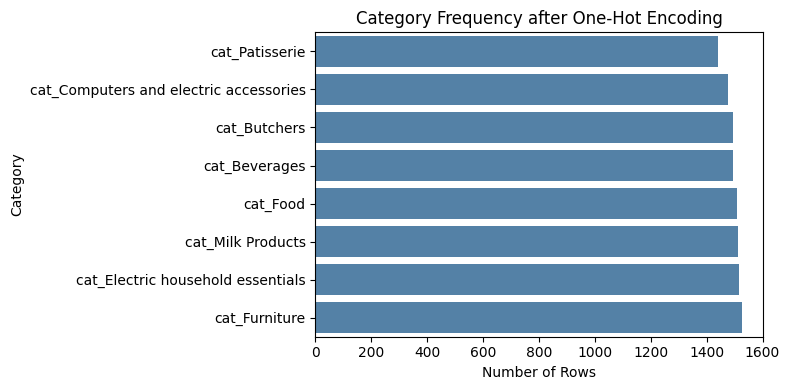

In [8]:
cat_cols = list(categoryDummies.columns)
counts = categoryDummies.sum().sort_values()

plt.figure(figsize=(8, 4))
sns.barplot(
    x=counts.values,
    y=counts.index,
    color="steelblue"  # single color, no palette warning
)
plt.title("Category Frequency after One-Hot Encoding")
plt.xlabel("Number of Rows")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

- The chart show how many rows fall into each Category after one-hot encoding
- There are 8 categories
- Because every bar sits near 1,500 rows, the dataset is well balanced
- Reading top to bottom: cat_Furniture is the most common (12.74%), followed closely by cat_Electric household essentials (12.66%) and cat_Milk Products (12.64%). The least frequent, cat_Patisserie, still contributes 12.04% of records.
- So the chart confirms the one-hot encoding produced eight equally sized dummy columns, preserving each category and keeping the dataset evenly distributed across them.


In [7]:
# === Save encoded dataset ===
dfOut.to_csv(CSV_OUT, index=False)
print(f"Saved: {CSV_OUT.resolve()}")
print("Finished One-Hot encoding for Category → added 0/1 columns with 'cat_' prefix.")

Saved: D:\CP610\encoded_output_data\3_category\encoded_category_dataset.csv
Finished One-Hot encoding for Category → added 0/1 columns with 'cat_' prefix.
